In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
GM = data.DataReader("GM", data_source="yahoo", start = "2010-11-15", end = "2019-06-01")
GM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-18,35.990002,33.889999,35.000000,34.189999,457044300.0,27.316826
2010-11-19,34.500000,33.110001,34.150002,34.259998,107842000.0,27.372751
2010-11-22,34.480000,33.810001,34.200001,34.080002,36650600.0,27.228945
2010-11-23,33.990002,33.189999,33.950001,33.250000,31170200.0,26.565796
2010-11-24,33.799999,33.220001,33.730000,33.480000,26138000.0,26.749556


In [3]:
GM.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-20,37.000000,36.639999,36.660000,36.970001,17521900.0,36.970001
2019-05-21,37.240002,36.730000,37.000000,37.130001,8387600.0,37.130001
2019-05-22,37.049999,35.410000,37.000000,35.549999,13264100.0,35.549999
2019-05-23,35.180000,34.349998,35.150002,35.130001,13746200.0,35.130001
2019-05-24,35.419998,34.869999,35.400002,35.119999,5262500.0,35.119999


In [4]:
GM.shape

(2142, 6)

In [5]:
GM_train = GM.iloc[:2042, :]
GM_train.shape

(2042, 6)

In [6]:
GM_test = GM.iloc[2042:, :]
GM_test.shape

(100, 6)

In [7]:
training_set = GM.iloc[:2042, 2:3].values
training_set

array([[35.        ],
       [34.15000153],
       [34.20000076],
       ...,
       [33.06999969],
       [33.95000076],
       [34.        ]])

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2041):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Fitting the RNN to the Training set using Keras Callbacks
es = EarlyStopping(monitor='loss', mode='min', min_delta=1e-10, patience=50, verbose=1)
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')
history = regressor.fit(X_train, y_train, shuffle=True, epochs = 100, callbacks=[es, rlr,mcp, tb],batch_size = 32)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Christy\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1981/1981 [==============================] - 45s 23ms/step - loss: 0.0331

Epoch 00001: loss improved from inf to 0.03310, saving model to weights.h5
Epoch 2/100
1981/1981 [==============================] - 31s 16ms/step - loss: 0.0072

Epoch 00002: loss improved from 0.03310 to 0.00716, saving model to weights.h5
Epoch 3/100
1981/1981 [==============================] - 31s 16ms/step - loss: 0.0067

Epoch 00003: loss improved from 0.00716 to 0.00670, saving model to weights.h5
Epoch 4/100
1981/1981 [==============================] - 31s 16ms/step - loss: 0.0065

Epoch 00004: loss improved from 0.00670 to 0.00645, saving model to weights.h5
Epoch 5/100
1981/1981 [==============================] - 32s 16ms/step - loss: 0.0061

Epoch 00005: loss improved from 0.00645 to 0.00611, saving model to weights.h5
Epoch 6/100
1981/1981 [==============================] - 35s 18ms/step - loss: 0.0056

Epoch 00006: loss improved from 0.00611

Epoch 51/100
1981/1981 [==============================] - 30s 15ms/step - loss: 0.0015

Epoch 00051: loss improved from 0.00153 to 0.00150, saving model to weights.h5
Epoch 52/100
1981/1981 [==============================] - 31s 16ms/step - loss: 0.0016

Epoch 00052: loss did not improve from 0.00150
Epoch 53/100
1981/1981 [==============================] - 32s 16ms/step - loss: 0.0015

Epoch 00053: loss improved from 0.00150 to 0.00149, saving model to weights.h5
Epoch 54/100
1981/1981 [==============================] - 31s 16ms/step - loss: 0.0015

Epoch 00054: loss did not improve from 0.00149
Epoch 55/100
1981/1981 [==============================] - 31s 16ms/step - loss: 0.0014

Epoch 00055: loss improved from 0.00149 to 0.00141, saving model to weights.h5
Epoch 56/100
1981/1981 [==============================] - 31s 16ms/step - loss: 0.0015

Epoch 00056: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00056: loss did not improve from 0.00141
Epoch 57/100


In [10]:
# Part 3 - Making the predictions and visualising the results

# Getting the real recent stock price until May 2019
real_stock_price = GM_test.iloc[:, 2:3].values

In [11]:
# Getting the predicted stock price until May 2019
GM_total = pd.concat((GM_train['Close'], GM_test['Close']), axis = 0)
inputs = GM_total[len(GM_total) - len(GM_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

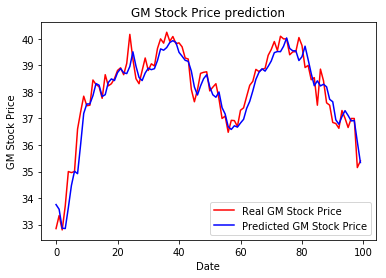

In [12]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real GM Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted GM Stock Price')
plt.title('GM Stock Price prediction')
plt.xlabel('Date')
plt.ylabel('GM Stock Price')
plt.legend()
plt.show()

In [13]:
#Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

0.47540999945021745

In [14]:
min_val=min(real_stock_price)
max_val=max(real_stock_price)
print ("relative error: ", rmse/(max_val-min_val))

relative error:  [0.06381342]


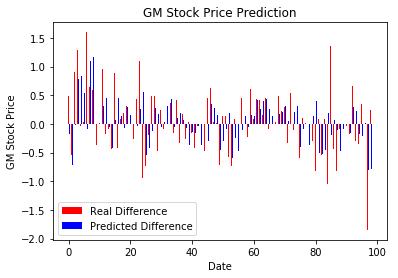

In [15]:
# Visualising the results
 
shift_pred= predicted_stock_price[:-1]
shift_pred = np.append(0, np.reshape(shift_pred, len(shift_pred)))
shift_real = real_stock_price[:-1]
shift_real = np.append(0, np.reshape(shift_real, len(shift_real)))
 
dif_pred = np.add(np.reshape(predicted_stock_price, len(predicted_stock_price)), - shift_pred)[1:]
dif_real = np.add(np.reshape(real_stock_price, len(real_stock_price)), - shift_real)[1:]
 
fig, ax = plt.subplots()
ind = np.arange(dif_real.size)
real_bar = ax.bar(ind-0.15, dif_real, width=0.3, color = 'red', label = 'Real Difference')
pred_bar = ax.bar(ind+0.15, dif_pred, width=0.3, color = 'blue', label = 'Predicted Difference')
ax.set_title('GM Stock Price Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('GM Stock Price')
ax.legend()
plt.show()